In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the training dataset
train = pd.read_csv('fraudTrain.csv')
# Importing the test dataset
test = pd.read_csv('fraudTest.csv')
# Viewing the dataset head
test.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [3]:
# Printing the shape of the datasets
print(test.shape),print(train.shape)

(555719, 23)
(1296675, 23)


(None, None)

In [4]:
# Viewing the null values from the test dataset
test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
# Viewing the null values from the train dataset
train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
# Viewing the train and test dataset information
test.info(), train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

(None, None)

In [7]:
#Convert the 'trans_date_trans_time' column to datetime format.
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])

#Extract the date component from 'trans_date_trans_time' column and store it in a new 'trans_date' column in string format.
train['trans_date'] = train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')

#Convert the 'trans_date' column to datetime format.
train['trans_date'] = pd.to_datetime(train['trans_date'])

#Convert the 'dob' column to datetime format.
train['dob'] = pd.to_datetime(train['dob'])

#Repeat the above steps for the 'test' dataset.
#Convert the 'trans_date_trans_time' column to datetime format.
test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])

#Extract the date component from 'trans_date_trans_time' column and store it in a new 'trans_date' column in string format.
test['trans_date'] = test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')

#Convert the 'trans_date' column to datetime format.
test['trans_date'] = pd.to_datetime(test['trans_date'])

#Convert the 'dob' column to datetime format.
test['dob'] = pd.to_datetime(test['dob'])

In [8]:
test.trans_date.head(),test.dob.head(),train.trans_date.head(),train.dob.head()

(0   2020-06-21
 1   2020-06-21
 2   2020-06-21
 3   2020-06-21
 4   2020-06-21
 Name: trans_date, dtype: datetime64[ns],
 0   1968-03-19
 1   1990-01-17
 2   1970-10-21
 3   1987-07-25
 4   1955-07-06
 Name: dob, dtype: datetime64[ns],
 0   2019-01-01
 1   2019-01-01
 2   2019-01-01
 3   2019-01-01
 4   2019-01-01
 Name: trans_date, dtype: datetime64[ns],
 0   1988-03-09
 1   1978-06-21
 2   1962-01-19
 3   1967-01-12
 4   1986-03-28
 Name: dob, dtype: datetime64[ns])

In [9]:
#Drop the 'Unnamed: 0' column from the 'train' dataset along the column axis.
train.drop("Unnamed: 0", axis=1, inplace=True)
#Drop the 'Unnamed: 0' column from the 'test' dataset along the column axis.
test.drop("Unnamed: 0", axis=1, inplace=True)
#Print the first five rows of the 'train' dataset to verify the changes.
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01


In [10]:
#Concatenate the 'test' and 'train' datasets vertically to create a new dataframe 'total'.
total = pd.concat([test, train])

#Display the information about the concatenated dataframe 'total'.
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

In [11]:
#If the value in the 'is_fraud' column is equal to 1, then the value in the 'is_fraud_cat' column is 'T', else 'F'.
total["is_fraud_cat"] = total.is_fraud.apply(lambda x: "T" if x==1 else "F")
#Convert the 'is_fraud_cat' column to object datatype.
total["is_fraud_cat"].astype("object")

0          F
1          F
2          F
3          F
4          F
          ..
1296670    F
1296671    F
1296672    F
1296673    F
1296674    F
Name: is_fraud_cat, Length: 1852394, dtype: object

In [12]:
# Select the columns in the 'total' dataframe that have object datatype, which includes categorical columns.
totalcat=total.select_dtypes(include=['object'])

In [13]:
# Select the subset of the 'total' dataframe that includes only the columns with categorical datatype.
total[totalcat.columns]

,merchant,category,first,last,gender,street,city,state,job,trans_num,is_fraud_cat
0,fraud_Kirlin and Sons,personal_care,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,F
1,fraud_Sporer-Keebler,personal_care,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,F
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,"Librarian, public",c81755dbbbea9d5c77f094348a7579be,F
3,fraud_Haley Group,misc_pos,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,Set designer,2159175b9efe66dc301f149d3d5abf8c,F
4,fraud_Johnston-Casper,travel,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,Furniture designer,57ff021bd3f328f8738bb535c302a31b,F
...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,Geoscientist,440b587732da4dc1a6395aba5fb41669,F
1296671,fraud_Abernathy and Sons,food_dining,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,"Production assistant, television",278000d2e0d2277d1de2f890067dcc0a,F
1296672,fraud_Stiedemann Ltd,food_dining,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,Naval architect,483f52fe67fabef353d552c1e662974c,F
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,Volunteer coordinator,d667cdcbadaaed3da3f4020e83591c83,F


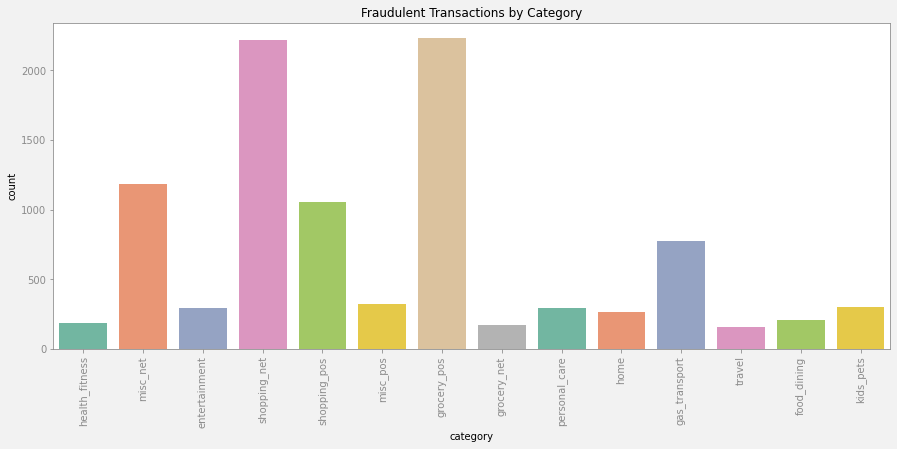

In [14]:
# create a figure instance with a given size
fig = plt.figure(figsize=(15, 6))

# create a countplot using seaborn
ax = sns.countplot(x='category', data=total[total['is_fraud_cat'] == "T"], palette='Set2')

# set the x-axis labels to 45-degree rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# set the title of the figure
plt.title("Fraudulent Transactions by Category")

# set the color of the figure background
fig.patch.set_facecolor('#F2F2F2')

# set the color of the axes
ax.spines['bottom'].set_color('#8B8B8B')
ax.spines['top'].set_color('#8B8B8B')
ax.spines['right'].set_color('#8B8B8B')
ax.spines['left'].set_color('#8B8B8B')

# set the color of the ticks
ax.tick_params(axis='x', colors='#8B8B8B')
ax.tick_params(axis='y', colors='#8B8B8B')

# show the figure
plt.show()

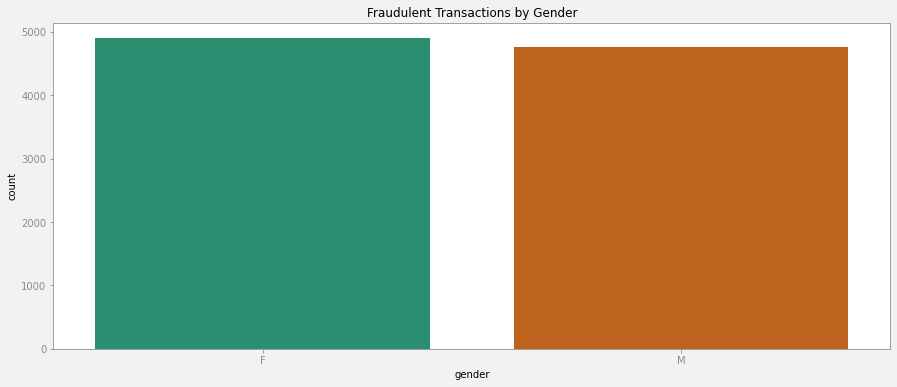

In [15]:
# create a figure instance with a given size
fig = plt.figure(figsize=(15, 6))

# create a countplot using seaborn
ax = sns.countplot(x='gender', data=total[total['is_fraud_cat'] == "T"], palette='Dark2')

# set the x-axis labels to 45-degree rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# set the title of the figure
plt.title("Fraudulent Transactions by Gender")

# set the color of the figure background
fig.patch.set_facecolor('#F2F2F2')

# set the color of the axes
ax.spines['bottom'].set_color('#8B8B8B')
ax.spines['top'].set_color('#8B8B8B')
ax.spines['right'].set_color('#8B8B8B')
ax.spines['left'].set_color('#8B8B8B')

# set the color of the ticks
ax.tick_params(axis='x', colors='#8B8B8B')
ax.tick_params(axis='y', colors='#8B8B8B')

# show the figure
plt.show()

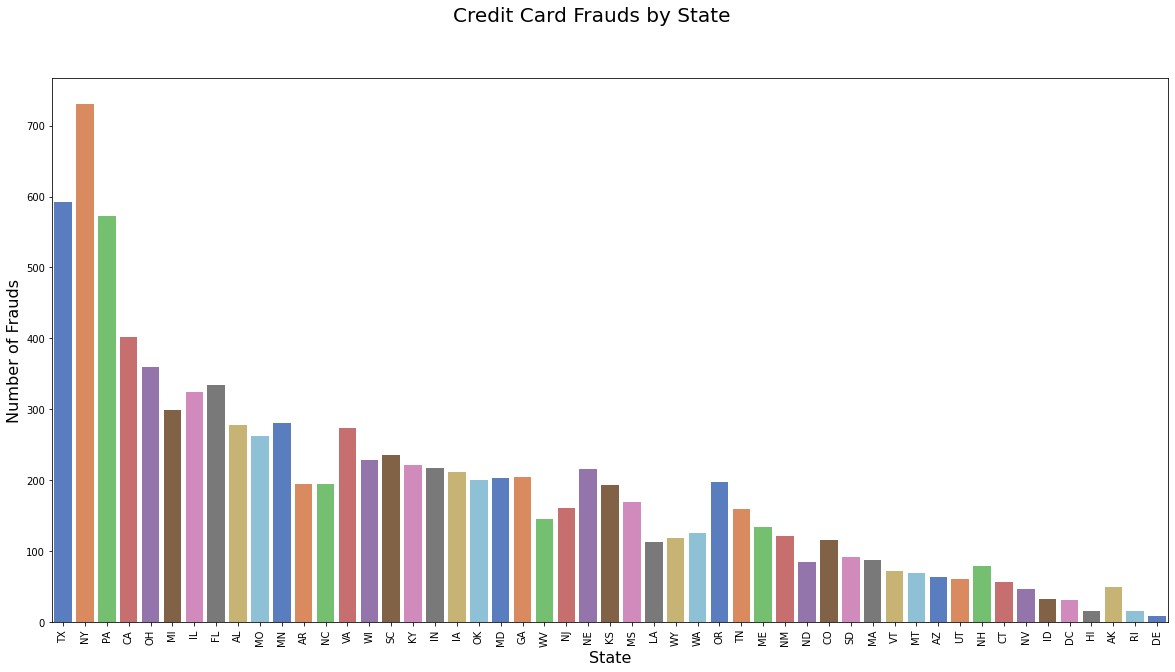

In [16]:
#Create figure with desired size and name
fig, ax = plt.subplots(figsize=(20, 10))
fig.suptitle("Credit Card Frauds by State", fontsize=20)

#Set color palette for the plot
colors = sns.color_palette("muted")

#Create countplot with the desired variables and order
sns.countplot(data=total[total['is_fraud_cat']=="T"], x='state', order=total['state'].value_counts().index, palette=colors)

#Rotate x-axis labels for better readability
plt.xticks(rotation=90)

#Set axis labels and title
ax.set_xlabel('State', fontsize=16)
ax.set_ylabel('Number of Frauds', fontsize=16)


# Display the plot
plt.show()

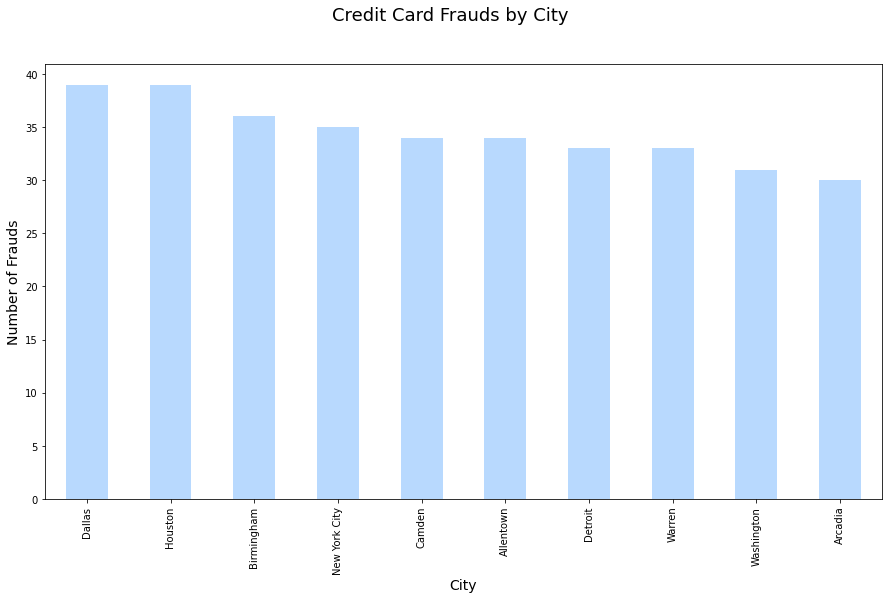

In [17]:
import random

#Define function to generate random colors
def randomcolor():
    r = random.random()
    b = random.random()
    g = random.random()
    rgb = [r,g,b]
    return rgb

#Create figure with desired size and name
fig, ax = plt.subplots(figsize=(15, 8))
fig.suptitle("Credit Card Frauds by City", fontsize=18)

#Generate a bar plot with desired variables
total[total['is_fraud_cat']=="T"]["city"].value_counts(sort=True, ascending=False).head(10).plot(kind="bar", ax=ax, color=randomcolor())

#Set axis labels and title
ax.set_xlabel('City', fontsize=14)
ax.set_ylabel('Number of Frauds', fontsize=14)

#Display the plot
plt.show()

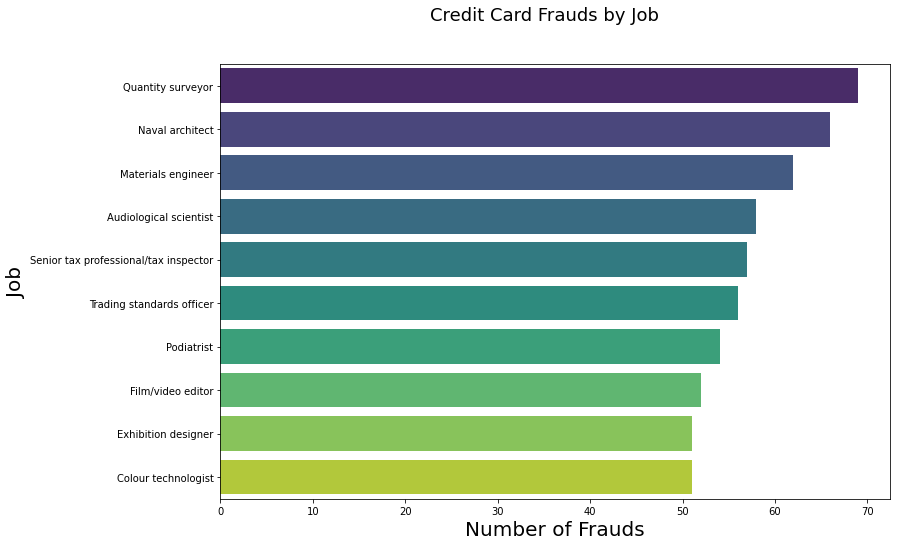

In [18]:
#Create figure with desired size and name
fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle("Credit Card Frauds by Job", fontsize=18)

#Generate a bar plot with desired variables
fraud_jobs = total[total['is_fraud_cat'] == "T"]["job"].value_counts().head(10)
sns.barplot(x=fraud_jobs.values, y=fraud_jobs.index, ax=ax, palette="viridis")

#Set axis labels and title
ax.set_xlabel('Number of Frauds', fontsize=20)
ax.set_ylabel('Job', fontsize=20)

#Display the plot
plt.show()

In [19]:
# Delete the 'is_fraud_cat' column from the 'total' dataframe.
del total['is_fraud_cat']
# Import the 'norm' and 'skew' functions from the 'scipy.stats' library.
from scipy.stats import norm, skew

In [20]:
# Select the columns in the 'test' dataframe that have numerical datatype.
testnum = test.select_dtypes(include=np.number)
# Select the subset of the 'test' dataframe that includes only the columns with numerical datatype.
test[testnum.columns]

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2291163933867244,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,3573030041201292,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,3598215285024754,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0
3,3591919803438423,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0
4,3526826139003047,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,43.77,63453,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0
555715,3556613125071656,111.84,77566,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0
555716,6011724471098086,86.88,99323,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0
555717,4079773899158,7.99,83643,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0


In [21]:
# Viewing null values from the dataset
total.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
trans_date               0
dtype: int64

In [22]:
# Display the information about the selected columns in the 'total' dataframe.
total[testnum.columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      int64  
 1   amt         float64
 2   zip         int64  
 3   lat         float64
 4   long        float64
 5   city_pop    int64  
 6   unix_time   int64  
 7   merch_lat   float64
 8   merch_long  float64
 9   is_fraud    int64  
dtypes: float64(5), int64(5)
memory usage: 155.5 MB


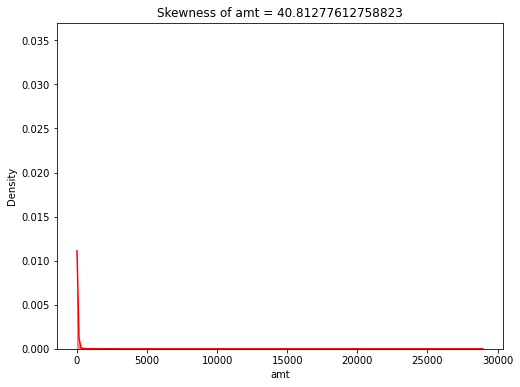

In [23]:
#Set figure size
plt.figure(figsize=(8,6))

#Generate random color for the distribution plot
color = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])

#Create distribution plot with normal curve and title with skewness value
sns.histplot(total['amt'], kde=True, stat="density", color='Red')
plt.title("Skewness of amt = " + str(skew(total['amt'])))

#Show the plot
plt.show()

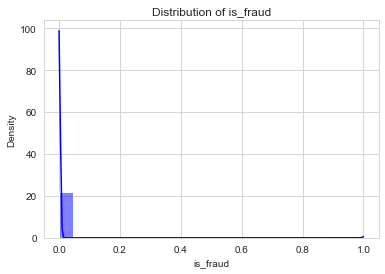

In [24]:
#Set style of the plot
sns.set_style('whitegrid')

#Create a histogram of the variable 'is_fraud' using seaborn's histplot function
sns.histplot(total['is_fraud'], kde=True, stat="density", color='blue')

#Set the title and labels for the plot
plt.title('Distribution of is_fraud')
plt.xlabel('is_fraud')
plt.ylabel('Density')

#Show the plot
plt.show()

In [25]:
# Drop the unnecessary columns from the 'total' dataframe along the column axis.
total.drop(['cc_num','merchant','first','last','street','zip','trans_num','unix_time'], axis=1, inplace=True)

# Display the information about the remaining columns in the 'total' dataframe.
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   city                   object        
 5   state                  object        
 6   lat                    float64       
 7   long                   float64       
 8   city_pop               int64         
 9   job                    object        
 10  dob                    datetime64[ns]
 11  merch_lat              float64       
 12  merch_long             float64       
 13  is_fraud               int64         
 14  trans_date             datetime64[ns]
dtypes: datetime64[ns](3), float64(5), int64(2), object(5)
memory usage: 226.1+ MB


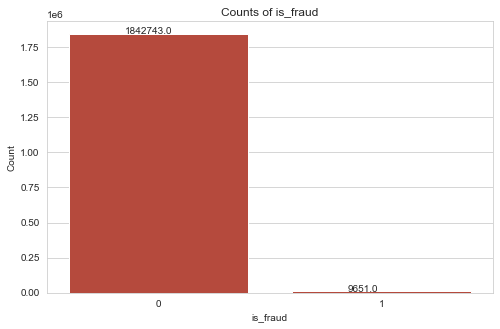

In [26]:
#Set figure size
plt.figure(figsize=(8,5))

#Create countplot of 'is_fraud' variable with random color and store the axis object
ax = sns.countplot(x="is_fraud", data=total,color='#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))

#Add annotation to the bars showing the count of each category
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

#Set the figure title and axis labels
plt.title('Counts of is_fraud')
plt.xlabel('is_fraud')
plt.ylabel('Count')

#Show the plot
plt.show()

In [27]:
# Subtract the 'dob' column from the 'trans_date' column to calculate the age of the customer and create a new column 'age'.
total["age"] = total["trans_date"] - total["dob"]
# Convert the 'age' column to timedelta datatype to enable date arithmetic.
total["age"] = total["age"].astype('timedelta64[Y]')
# Display the first five rows of the 'age' column in the 'total' dataframe.
total["age"].head()

0    52.0
1    30.0
2    49.0
3    32.0
4    64.0
Name: age, dtype: float64

In [28]:
# viewing the total data frame information
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   city                   object        
 5   state                  object        
 6   lat                    float64       
 7   long                   float64       
 8   city_pop               int64         
 9   job                    object        
 10  dob                    datetime64[ns]
 11  merch_lat              float64       
 12  merch_long             float64       
 13  is_fraud               int64         
 14  trans_date             datetime64[ns]
 15  age                    float64       
dtypes: datetime64[ns](3), float64(6), int64(2), object(5)
memory usage: 240.3+ MB


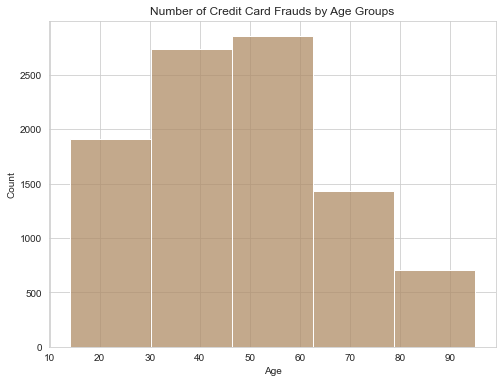

In [29]:
#Create a subset of the data for fraud transactions
fraud = total[total["is_fraud"] == 1]
#set the figure size
plt.figure(figsize=(8,6))
#Create a histogram of the age variable for fraud transactions with a specified number of bins and color
sns.histplot(fraud['age'], kde=False, bins=5, color='#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
#Set the title and axis labels for the plot
plt.title("Number of Credit Card Frauds by Age Groups")
plt.xlabel("Age")
plt.ylabel("Count")
#Show the plot
plt.show()

In [30]:
# Extract the month from the 'trans_date' column and create a new column 'trans_month'.
total['trans_month'] = pd.DatetimeIndex(total['trans_date']).month
# Extract the year from the 'trans_date' column and create a new column 'trans_year'.
total['trans_year'] = pd.DatetimeIndex(total['trans_date']).year

In [31]:
# Import the 'calendar' module to use the 'month_abbr' function.
import calendar
# Convert the month number to month name and create a new column 'Month_name'.
total['Month_name'] = total['trans_month'].apply(lambda x: calendar.month_abbr[x])

In [32]:
from randomcolor import RandomColor

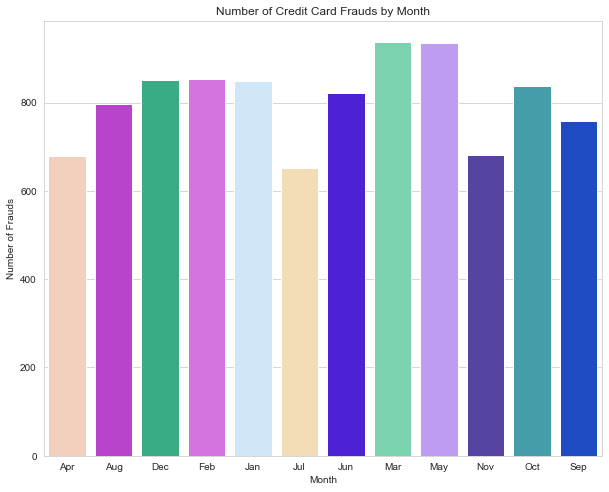

In [33]:
# Create an instance of the 'RandomColor' class to generate random colors.
color = RandomColor()
# Set the figure size.
plt.figure(figsize=(10, 8))
# Select the rows in the 'total' dataframe where the 'is_fraud' column is 1 and group them by the month name to count the number of frauds in each month.
fraud_month_count = total[total["is_fraud"] == 1].groupby('Month_name')['is_fraud'].count().reset_index()
# Create a barplot of the 'fraud_month_count' dataframe using seaborn.
sns.barplot(x='Month_name', y='is_fraud', data=fraud_month_count, palette=color.generate(count=15))
# Set the title of the plot.
plt.title("Number of Credit Card Frauds by Month")
# Set the x-axis and y-axis labels.
plt.xlabel("Month")
plt.ylabel("Number of Frauds")
# Save the plot with a given name and format.
plt.savefig('fraud_month_count.png', format='png')
# Display the plot.
plt.show()

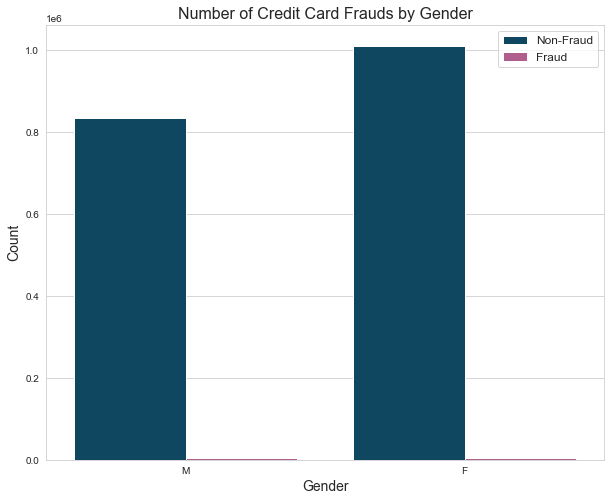

In [34]:
# Create a figure with a specified size and add a subplot to it
fig, ax = plt.subplots(figsize=(10, 8))
# Define the color palette for the plot
colors = ["#004c6d", "#bc5090"]
# Use seaborn's countplot function to plot the number of credit card frauds by gender
sns.countplot(x="gender", hue="is_fraud", data=total, palette=colors, ax=ax)
# Set the title of the plot and adjust the font size
ax.set_title("Number of Credit Card Frauds by Gender", fontsize=16)
# Set the x-label and adjust the font size
ax.set_xlabel("Gender", fontsize=14)
# Set the y-label and adjust the font size
ax.set_ylabel("Count", fontsize=14)
# Set the legend and adjust the font size
ax.legend(["Non-Fraud", "Fraud"], fontsize=12)
# Save the figure with a specified name
plt.savefig("credit_card_frauds_by_gender.png", dpi=300)
# Display the plot
plt.show()

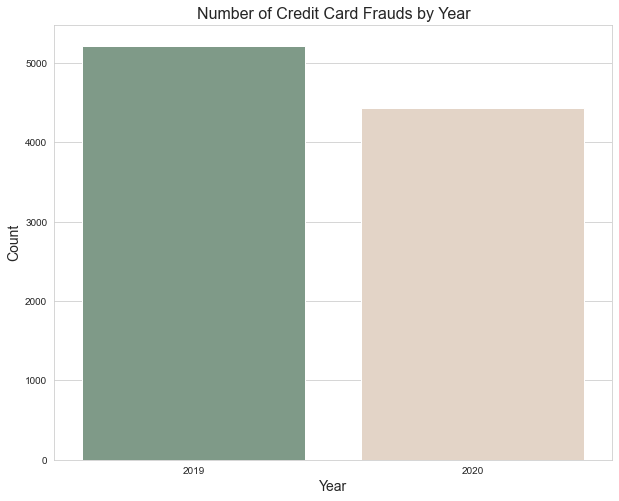

In [35]:
# Create a figure with a specified size and add a subplot to it
fig, ax = plt.subplots(figsize=(10, 8))
# Define the color palette for the plot
colors = ["#7b9e87", "#e7d4c3", "#f7a4b4"]
# Use seaborn's countplot function to plot the number of credit card frauds by year
sns.countplot(x="trans_year", data=total[total["is_fraud"]==1], palette=colors, ax=ax)
# Set the title of the plot and adjust the font size
ax.set_title("Number of Credit Card Frauds by Year", fontsize=16)
# Set the x-label and adjust the font size
ax.set_xlabel("Year", fontsize=14)
# Set the y-label and adjust the font size
ax.set_ylabel("Count", fontsize=14)
# Save the figure with a specified name
plt.savefig("credit_card_frauds_by_year.png", dpi=300)
# Display the plot
plt.show()

In [36]:
# Create a new column in the 'total' DataFrame called 'latitudinal_distance' that calculates the absolute difference
# between the 'merch_lat' and 'lat' columns, rounded to 3 decimal places
total['latitudinal_distance'] = abs(round(total['merch_lat']-total['lat'],3))
# Create a new column in the 'total' DataFrame called 'longitudinal_distance' that calculates the absolute difference
# between the 'merch_long' and 'long' columns, rounded to 3 decimal places
total['longitudinal_distance'] = abs(round(total['merch_long']-total['long'],3))

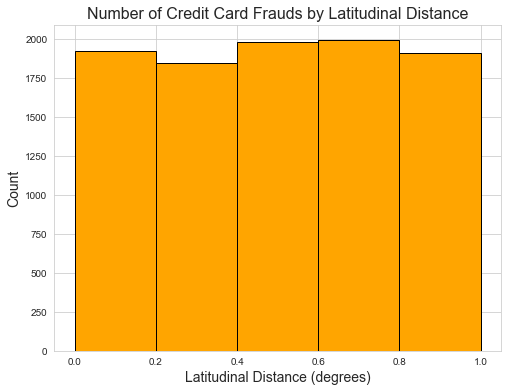

In [37]:
# Create a new DataFrame called 'fraud' that only includes rows where 'is_fraud' is equal to 1
fraud = total[total["is_fraud"]==1]
# Create a figure with a specified size and add a subplot to it
fig, ax = plt.subplots(figsize=(8, 6))
# Define the color palette for the plot
colors = ["Orange"]
# Use the hist() function to plot a histogram of the 'latitudinal_distance' column in the 'fraud' DataFrame
ax.hist(fraud.latitudinal_distance, bins=5, edgecolor="black", color=colors)
# Set the title of the plot and adjust the font size
ax.set_title("Number of Credit Card Frauds by Latitudinal Distance", fontsize=16)
# Set the x-label and adjust the font size
ax.set_xlabel("Latitudinal Distance (degrees)", fontsize=14)
# Set the y-label and adjust the font size
ax.set_ylabel("Count", fontsize=14)
# Save the figure with a specified name
plt.savefig("credit_card_frauds_by_latitudinal_distance.png", dpi=300)
# Display the plot
plt.show()

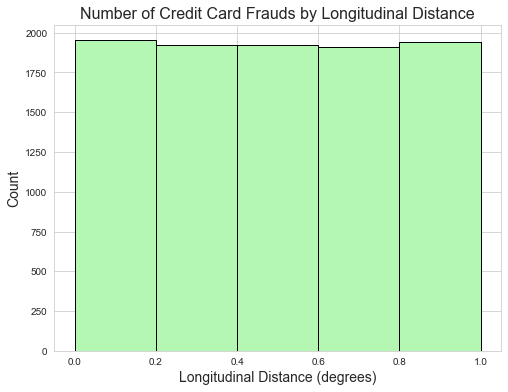

In [38]:
# Create a new DataFrame called 'fraud' that only includes rows where 'is_fraud' is equal to 1
fraud = total[total["is_fraud"]==1]
# Create a figure with a specified size and add a subplot to it
fig, ax = plt.subplots(figsize=(8, 6))
# Define the color palette for the plot
colors = ["#b4f7b2"]
# Use the hist() function to plot a histogram of the 'longitudinal_distance' column in the 'fraud' DataFrame
ax.hist(fraud.longitudinal_distance, bins=5, edgecolor="black", color=colors)
# Set the title of the plot and adjust the font size
ax.set_title("Number of Credit Card Frauds by Longitudinal Distance", fontsize=16)
# Set the x-label and adjust the font size
ax.set_xlabel("Longitudinal Distance (degrees)", fontsize=14)
# Set the y-label and adjust the font size
ax.set_ylabel("Count", fontsize=14)
# Save the figure with a specified name
plt.savefig("credit_card_frauds_by_longitudinal_distance.png", dpi=300)
# Display the plot
plt.show()

In [39]:
# Viewing the total data frame information
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   city                   object        
 5   state                  object        
 6   lat                    float64       
 7   long                   float64       
 8   city_pop               int64         
 9   job                    object        
 10  dob                    datetime64[ns]
 11  merch_lat              float64       
 12  merch_long             float64       
 13  is_fraud               int64         
 14  trans_date             datetime64[ns]
 15  age                    float64       
 16  trans_month            int64         
 17  trans_year             int64         
 18  Month_name            

In [40]:
# Viewing the gender value counts
total.gender.value_counts()

F    1014749
M     837645
Name: gender, dtype: int64

In [41]:
# Use the apply() function to transform the 'gender' column in the 'total' DataFrame
# If the gender is "M", the function returns 1, else it returns 0
total.gender = total.gender.apply(lambda x: 1 if x == "M" else 0)
# Use the value_counts() function to count the number of occurrences of each value in the 'gender' column
# This will return a Series with the counts of each value (1 for Male and 0 for Female)
total.gender.value_counts()

0    1014749
1     837645
Name: gender, dtype: int64

In [42]:
# Create a list of column names to be dropped from the 'total' DataFrame
drop_cols = ['trans_date_trans_time', 'city', 'lat', 'long', 'job', 'dob', 'merch_lat', 'merch_long', 'trans_date', 'state']
# Use the drop() function to remove the specified columns from the 'total' DataFrame
# The 'axis=1' parameter indicates that we are dropping columns (as opposed to rows)
total = total.drop(drop_cols, axis=1)
# Use the info() function to display information about the DataFrame, 
# including the data types and number of non-null values for each column
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   category               object 
 1   amt                    float64
 2   gender                 int64  
 3   city_pop               int64  
 4   is_fraud               int64  
 5   age                    float64
 6   trans_month            int64  
 7   trans_year             int64  
 8   Month_name             object 
 9   latitudinal_distance   float64
 10  longitudinal_distance  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 169.6+ MB


In [43]:
# Use the get_dummies() function from the pandas library to create dummy variables for the 'category' column in the 'total' DataFrame
# This creates a new DataFrame with binary columns representing each unique value in the 'category' column
# The 'drop_first=True' parameter is used to drop the first binary column to avoid multicollinearity
total = pd.get_dummies(total, columns=['category'], drop_first=True)
# Use the info() function to display information about the DataFrame, 
# including the data types and number of non-null values for each column
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amt                      float64
 1   gender                   int64  
 2   city_pop                 int64  
 3   is_fraud                 int64  
 4   age                      float64
 5   trans_month              int64  
 6   trans_year               int64  
 7   Month_name               object 
 8   latitudinal_distance     float64
 9   longitudinal_distance    float64
 10  category_food_dining     uint8  
 11  category_gas_transport   uint8  
 12  category_grocery_net     uint8  
 13  category_grocery_pos     uint8  
 14  category_health_fitness  uint8  
 15  category_home            uint8  
 16  category_kids_pets       uint8  
 17  category_misc_net        uint8  
 18  category_misc_pos        uint8  
 19  category_personal_care   uint8  
 20  category_shopping_net    uint8  
 21  category

In [44]:
# Viewing the total data frame head
total.head(5)

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,Month_name,latitudinal_distance,longitudinal_distance,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,1,333497,0,52.0,6,2020,Jun,0.020,0.265,...,0,0,0,0,0,0,1,0,0,0
1,29.84,0,302,0,30.0,6,2020,Jun,0.870,0.476,...,0,0,0,0,0,0,1,0,0,0
2,41.28,0,34496,0,49.0,6,2020,Jun,0.177,0.660,...,0,1,0,0,0,0,0,0,0,0
3,60.05,1,54767,0,32.0,6,2020,Jun,0.243,0.064,...,0,0,0,0,0,1,0,0,0,0
4,3.19,1,1126,0,64.0,6,2020,Jun,0.706,0.868,...,0,0,0,0,0,0,0,0,0,1


In [45]:
# Import the train_test_split() function from the sklearn.model_selection module
# This function will be used to split the data into training and testing sets
from sklearn.model_selection import train_test_split
# Import the resample() function from the sklearn.utils module
# This function will be used to upsample the minority class in the training data to address class imbalance
from sklearn.utils import resample

In [46]:
# Create a new DataFrame 'df_majority' that contains all the rows in the 'total' DataFrame where the 'is_fraud' column equals 0 (i.e. the majority class)
df_majority = total[(total['is_fraud'] == 0)]
# Create a new DataFrame 'df_minority' that contains all the rows in the 'total' DataFrame where the 'is_fraud' column equals 1 (i.e. the minority class)
df_minority = total[(total['is_fraud'] == 1)]
# Use the shape attribute to get the number of rows and columns in each DataFrame
df_majority.shape, df_minority.shape

((1842743, 23), (9651, 23))

In [47]:
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 1842743, # to match majority class
                                 random_state=42)  # reproducible results
df_minority_upsampled.shape

(1842743, 23)

In [48]:
# Use the concat() function to concatenate the upsampled minority class DataFrame and the majority class DataFrame
total_upsampled = pd.concat([df_minority_upsampled, df_majority])
# Use the shape attribute to get the number of rows and columns in the concatenated DataFrame
total_upsampled.shape

(3685486, 23)

In [49]:
# Get a list of all columns in the upsampled DataFrame
x_cols = list(total_upsampled.columns)
# Remove the 'is_fraud' column from the list of columns
x_cols.remove('is_fraud')
# Print the resulting list of columns
x_cols

['amt',
 'gender',
 'city_pop',
 'age',
 'trans_month',
 'trans_year',
 'Month_name',
 'latitudinal_distance',
 'longitudinal_distance',
 'category_food_dining',
 'category_gas_transport',
 'category_grocery_net',
 'category_grocery_pos',
 'category_health_fitness',
 'category_home',
 'category_kids_pets',
 'category_misc_net',
 'category_misc_pos',
 'category_personal_care',
 'category_shopping_net',
 'category_shopping_pos',
 'category_travel']

In [50]:
# Get the input features (X) and target variable (Y) from the upsampled DataFrame
X = total_upsampled[x_cols]
Y = total_upsampled['is_fraud']

# Print information about the X DataFrame
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3685486 entries, 909017 to 1296674
Data columns (total 22 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amt                      float64
 1   gender                   int64  
 2   city_pop                 int64  
 3   age                      float64
 4   trans_month              int64  
 5   trans_year               int64  
 6   Month_name               object 
 7   latitudinal_distance     float64
 8   longitudinal_distance    float64
 9   category_food_dining     uint8  
 10  category_gas_transport   uint8  
 11  category_grocery_net     uint8  
 12  category_grocery_pos     uint8  
 13  category_health_fitness  uint8  
 14  category_home            uint8  
 15  category_kids_pets       uint8  
 16  category_misc_net        uint8  
 17  category_misc_pos        uint8  
 18  category_personal_care   uint8  
 19  category_shopping_net    uint8  
 20  category_shopping_pos    uint8  
 21  cat

In [51]:
X = X.drop('Month_name', axis=1)

In [52]:
# Split the data into training and test sets using train_test_split
# X_train and Y_train will be used for training the model, and X_test and Y_test for evaluating it
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [53]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
sc = StandardScaler()
# Scale the training data using the fit_transform method of the StandardScaler object
X_train_std = sc.fit_transform(X_train)
# Scale the testing data using the fit_transform method of the StandardScaler object
X_test_std = sc.fit_transform(X_test)

In [54]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression object with the 'liblinear' solver
logit_model = LogisticRegression(solver='liblinear')
# Fit the logistic regression model to the scaled training data and corresponding target variable
logit_model.fit(X_train_std, Y_train)

LogisticRegression(solver='liblinear')

In [55]:
# Create an empty DataFrame object to hold the feature importances
feature = pd.DataFrame()
# Add a 'column' column to the DataFrame containing the column names from the X_train DataFrame
feature['column'] = X_train.columns
# Add an 'importance' column to the DataFrame containing the coefficients from the fitted logistic regression model
feature['importance'] = logit_model.coef_[0]
# Sort the DataFrame in descending order based on the 'importance' column
feature.sort_values('importance', ascending=False, inplace=True)
# Print the resulting DataFrame
print(feature)

                     column  importance
0                       amt    4.032866
9    category_gas_transport    0.821942
11     category_grocery_pos    0.699875
17   category_personal_care    0.485022
14       category_kids_pets    0.464901
16        category_misc_pos    0.456415
10     category_grocery_net    0.396761
20          category_travel    0.378934
12  category_health_fitness    0.357834
8      category_food_dining    0.325250
13            category_home    0.228721
3                       age    0.034244
6      latitudinal_distance    0.015180
7     longitudinal_distance   -0.008461
2                  city_pop   -0.032921
1                    gender   -0.084231
5                trans_year   -0.091934
4               trans_month   -0.241496
15        category_misc_net   -0.244440
19    category_shopping_pos   -0.543778
18    category_shopping_net   -0.769741


In [56]:
# Import necessary modules from sklearn.metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, accuracy_score, f1_score
# Create an instance of the LogisticRegression class with the 'liblinear' solver
Logit1 = LogisticRegression(solver='liblinear')
# Fit the logistic regression model to the scaled training data and corresponding target variable
Logit1.fit(X_train_std, Y_train)
# Print the score of the model on the training and test sets
print("Score of the model with X-train and Y-train is : ", str(round(Logit1.score(X_train,Y_train)*100,2)),"%")
print("Score of the model with X-test and Y-test is : ", str(round(Logit1.score(X_test,Y_test)*100,2)),"%")
# Generate predictions for the test set using the trained model
Y_pred = Logit1.predict(X_test_std)
# Calculate and print the mean absolute error between the predicted and actual values
print("Mean absolute error is ", mean_absolute_error(Y_test, Y_pred))
# Calculate and print the mean squared error between the predicted and actual values
print("Mean squared error is ", mean_squared_error(Y_test, Y_pred))
# Calculate and print the median absolute error between the predicted and actual values
print("Median absolute error is ", median_absolute_error(Y_test, Y_pred))
# Calculate and print the accuracy of the predictions
print("Accuracy is ", round(accuracy_score(Y_test, Y_pred)*100,2),"%")
# Calculate and print the F1 score of the predictions
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score of the model with X-train and Y-train is :  67.89 %
Score of the model with X-test and Y-test is :  67.84 %
Mean absolute error is  0.17745818192868895
Mean squared error is  0.17745818192868895
Median absolute error is  0.0
Accuracy is  82.25 %
F1 score:  82.16 %
